In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
# Set display options for better readability
pd.set_option('display.max_columns', None)


In [3]:
# Load the dataset
data_path = '/content/drive/MyDrive/Fraud Detection/bank_transactions_data.csv'
df = pd.read_csv(data_path)

In [5]:
# Preview the dataset
print("Initial Data Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Initial Data Overview:
  TransactionID AccountID  TransactionAmount   TransactionDate  \
0      TX000001   AC00128              14.09  11/04/2023 16:29   
1      TX000002   AC00455             376.24  27/06/2023 16:44   
2      TX000003   AC00019             126.29  10/07/2023 18:16   
3      TX000004   AC00070             184.50  05/05/2023 16:32   
4      TX000005   AC00411              13.45  16/10/2023 17:51   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                 

In [6]:
# Check for duplicates based on all columns
duplicates = df[df.duplicated(keep=False)]

if not duplicates.empty:
  print("\nDuplicate Rows:")
  print(duplicates)
else:
  print("\nNo duplicate rows found.")

# Check for duplicates based on specific columns (example: 'TransactionID', 'CustomerID')
# Replace 'TransactionID', 'CustomerID' with your actual column names
specific_columns = ['TransactionID', 'AccountID']
duplicates_specific = df[df.duplicated(subset=specific_columns, keep=False)]

if not duplicates_specific.empty:
  print("\nDuplicate Rows based on specific columns:")
  print(duplicates_specific)
else:
  print("\nNo duplicate rows found based on the specified columns.")



No duplicate rows found.

No duplicate rows found based on the specified columns.


In [8]:
# Handling Outliers
# Using Z-score method for numerical columns
from scipy import stats

# Get numerical columns from the DataFrame
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df[numerical_cols]))

# Filter the DataFrame based on Z-scores
df = df[(z_scores < 3).all(axis=1)]

In [9]:
# Assuming you want to print the DataFrame *after* outlier removal
print("\nData after outlier removal:")
print(df.head())
print("\nDataset Info after outlier removal:")
print(df.info())


Data after outlier removal:
  TransactionID AccountID  TransactionAmount   TransactionDate  \
0      TX000001   AC00128              14.09  11/04/2023 16:29   
1      TX000002   AC00455             376.24  27/06/2023 16:44   
2      TX000003   AC00019             126.29  10/07/2023 18:16   
3      TX000004   AC00070             184.50  05/05/2023 16:32   
4      TX000005   AC00411              13.45  16/10/2023 17:51   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor           

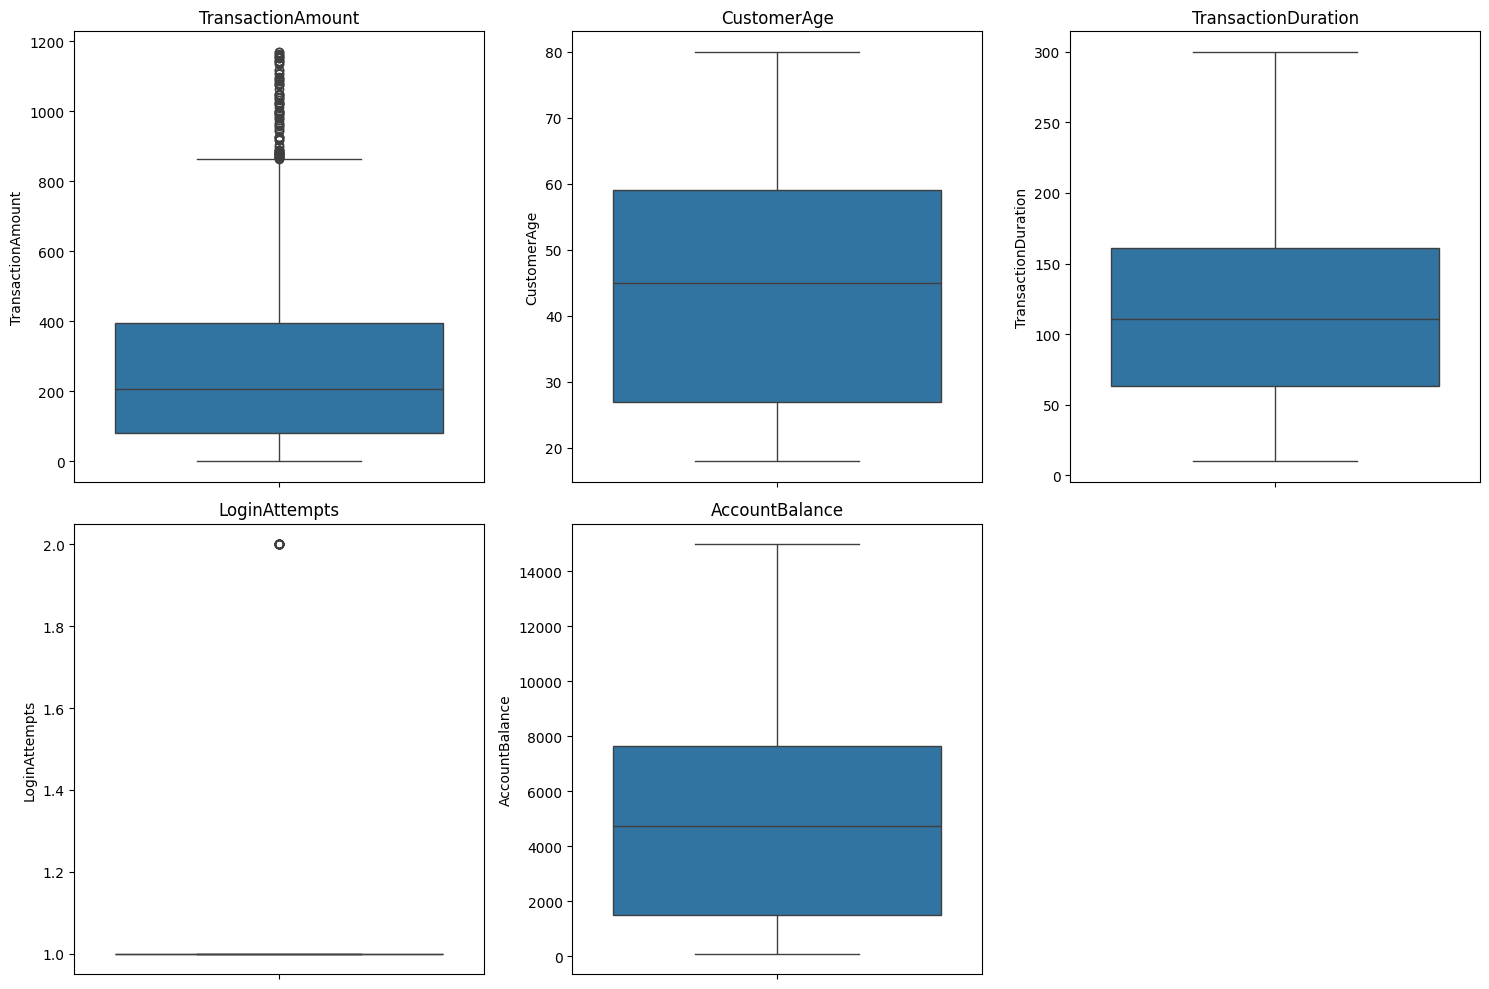

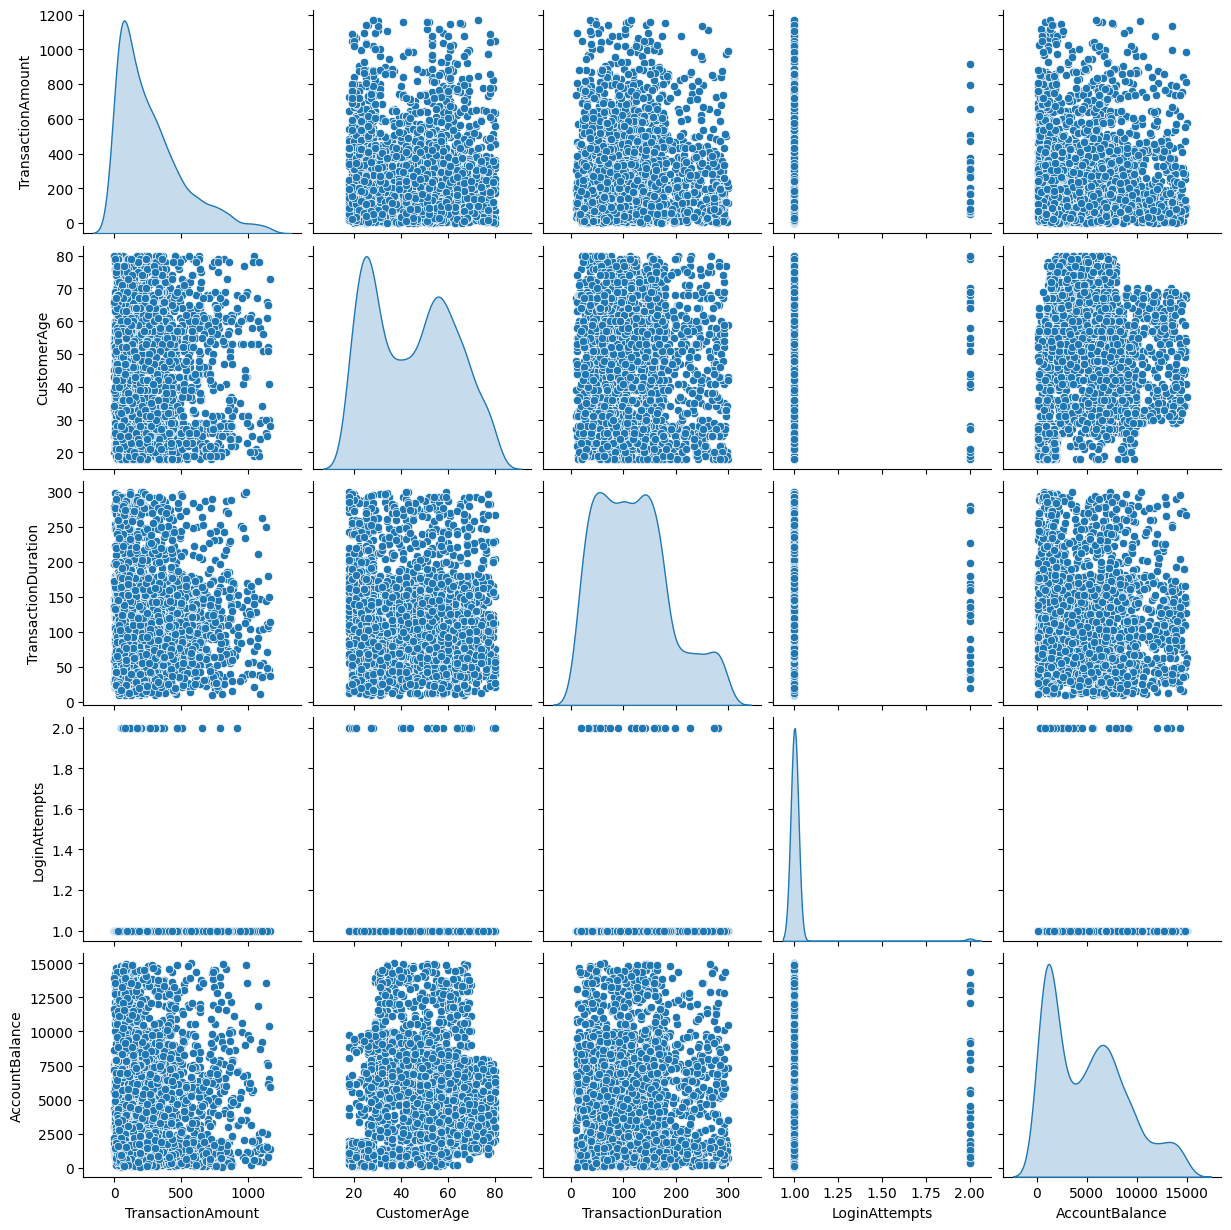

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_cols' is defined as in the previous code

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Adjust subplots layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Create scatter plots for pairs of numerical features (optional)
# This helps to visualize potential outlier combinations
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.show()


In [13]:
# Data Type Conversion
# Convert date columns to datetime
import pandas as pd
if 'transaction_date' in df.columns:
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [14]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,11/04/2023 16:29,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,04/11/2024 08:08
1,TX000002,AC00455,376.24,27/06/2023 16:44,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,04/11/2024 08:09
2,TX000003,AC00019,126.29,10/07/2023 18:16,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,04/11/2024 08:07
3,TX000004,AC00070,184.50,05/05/2023 16:32,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,04/11/2024 08:09
4,TX000005,AC00411,13.45,16/10/2023 17:51,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,04/11/2024 08:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,26/04/2023 17:09,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,04/11/2024 08:11
2508,TX002509,AC00322,251.54,22/03/2023 17:36,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,04/11/2024 08:11
2509,TX002510,AC00095,28.63,21/08/2023 17:08,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,04/11/2024 08:08
2510,TX002511,AC00118,185.97,24/02/2023 16:24,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,04/11/2024 08:12


In [15]:
# Save the cleaned dataset
cleaned_data_path = '/content/drive/MyDrive/Fraud Detection/bank_transactions_cleaned.csv'
os.makedirs(os.path.dirname(cleaned_data_path), exist_ok=True)
df.to_csv(cleaned_data_path, index=False)

print(f"\nData cleaning completed. Cleaned data saved to {cleaned_data_path}")


Data cleaning completed. Cleaned data saved to /content/drive/MyDrive/Fraud Detection/bank_transactions_cleaned.csv
